In [1]:
from portfolio_analysis import download_daily_data, load_daily_data
tickers = ['SPY', 'GC=F', 'EURUSD=X', 'JPY=X', 'AAPL']
tickers = ['SPY', 'SWPPX']

# download_daily_data(tickers)
data = load_daily_data(tickers)

Loaded data/SPY.pkl
Loaded data/SWPPX.pkl


DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23',
               '2024-05-24', '2024-05-28'],
              dtype='datetime64[ns]', name='Date', length=2114, freq=None)
DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2024-05-14', '2024-05-15', '2024-05-16', '2024-05-17',
               '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23',
               '2024-05-24', '2024-05-28'],
              dtype='datetime64[ns]', name='Date', length=2114, freq=None)


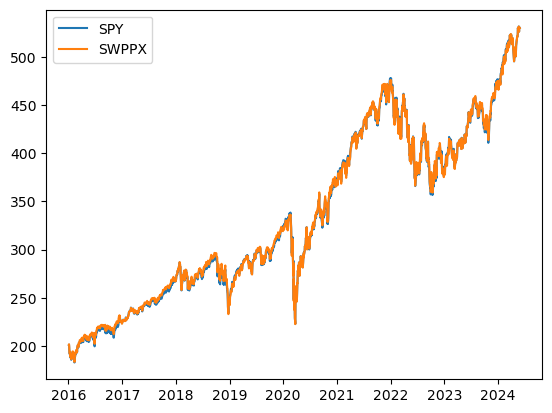

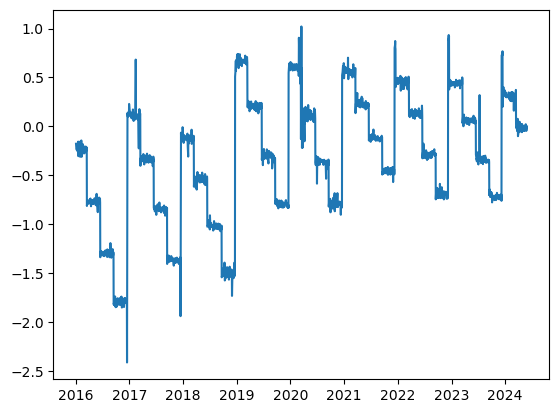

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Get multiplier
date = pd.to_datetime('2024-05-28')
spy_val = data['SPY'].loc[date]['Close']
swppx_val = data['SWPPX'].loc[date]['Close']
multiplier = spy_val / swppx_val

# Multiply SWPPX by multiplier
data['SWPPX']['Close'] = data['SWPPX']['Close'] * multiplier

# Plot daily closes
for ticker in tickers:
    df = data[ticker]
    xs = df.index
    print(xs)
    ys = df['Close']
    plt.plot(xs, ys, label=ticker)

plt.legend()
plt.show()

# Plot differences
difs = data['SPY']['Close'] - data['SWPPX']['Close']
pc_difs = difs * 100 / data['SPY']['Close']
plt.plot(difs.index, pc_difs)
plt.show()

In [3]:
# Calculate betas for each stock...
for ticker in tickers:
    if ticker == 'SPY': continue

    spy_data = data['SPY']['Close'].pct_change()
    stock_data = data[ticker]['Close'].pct_change()

    cov = stock_data.cov(spy_data)
    var = spy_data.var()

    beta = cov / var

    print(f'{ticker}: {beta:.2f}')

GC=F: 0.03
EURUSD=X: 0.02
JPY=X: -0.01
AAPL: 1.22


In [5]:
print(data['SPY'][['Open', 'Close', 'Adj Close']])

                  Open       Close   Adj Close
Date                                          
2016-01-04  200.490005  201.020004  174.043198
2016-01-05  201.399994  201.360001  174.337540
2016-01-06  198.339996  198.820007  172.138443
2016-01-07  195.330002  194.050003  168.008530
2016-01-08  195.190002  191.919998  166.164383
...                ...         ...         ...
2024-05-20  529.570007  530.059998  530.059998
2024-05-21  529.280029  531.359985  531.359985
2024-05-22  530.650024  529.830017  529.830017
2024-05-23  532.960022  525.960022  525.960022
2024-05-24  527.849976  529.440002  529.440002

[2113 rows x 3 columns]


In [2]:
import yfinance as yf
yca = yf.Ticker("NVDA")
yca = yca.history(interval="1m", period = "1d")
yca['Close'][-1]

1118.1099853515625

In [9]:
x = 1.05
for i in range(20):
    x = x * 1.05
    print(i, x)

0 1.1025
1 1.1576250000000001
2 1.2155062500000002
3 1.2762815625000004
4 1.3400956406250004
5 1.4071004226562505
6 1.477455443789063
7 1.5513282159785162
8 1.628894626777442
9 1.7103393581163142
10 1.79585632602213
11 1.8856491423232367
12 1.9799315994393987
13 2.0789281794113688
14 2.1828745883819374
15 2.2920183178010345
16 2.406619233691086
17 2.5269501953756404
18 2.6532977051444226
19 2.785962590401644


In [30]:
# https://developers.binance.com/docs/derivatives/usds-margined-futures/websocket-market-streams/Aggregate-Trade-Streams
import json
import websocket
import pandas as pd

asset = 'BTCUSDT'

# types = ['markPrice', 'aggTrade', 'kline_1m']
# assets = [f'{coin.lower()}@kline_1min' for coin in assets]
socket_str = f'{asset.lower()}@kline_1m'


def on_message(ws, message):
    global source
    message = json.loads(message)
    source = message
    print(message)

# socket = f'wss://fstream.binance.com/stream?streams=bnbusdt@aggTrade/btcusdt@markPrice/btcusdt@kline_1m'
socket = f'wss://fstream.binance.com/stream?streams={socket_str}'

ws = websocket.WebSocketApp(socket, on_message=on_message)

In [31]:
ws.run_forever()

{'stream': 'btcusdt@kline_1m', 'data': {'e': 'kline', 'E': 1717873884640, 's': 'BTCUSDT', 'k': {'t': 1717873860000, 'T': 1717873919999, 's': 'BTCUSDT', 'i': '1m', 'f': 5073595001, 'L': 5073595235, 'o': '69513.00', 'c': '69504.50', 'h': '69513.00', 'l': '69504.50', 'v': '13.442', 'n': 235, 'x': False, 'q': '934347.82330', 'V': '1.313', 'Q': '91262.24840', 'B': '0'}}}
{'stream': 'btcusdt@kline_1m', 'data': {'e': 'kline', 'E': 1717873884971, 's': 'BTCUSDT', 'k': {'t': 1717873860000, 'T': 1717873919999, 's': 'BTCUSDT', 'i': '1m', 'f': 5073595001, 'L': 5073595238, 'o': '69513.00', 'c': '69504.50', 'h': '69513.00', 'l': '69504.50', 'v': '13.456', 'n': 238, 'x': False, 'q': '935320.88630', 'V': '1.313', 'Q': '91262.24840', 'B': '0'}}}
{'stream': 'btcusdt@kline_1m', 'data': {'e': 'kline', 'E': 1717873885255, 's': 'BTCUSDT', 'k': {'t': 1717873860000, 'T': 1717873919999, 's': 'BTCUSDT', 'i': '1m', 'f': 5073595001, 'L': 5073595239, 'o': '69513.00', 'c': '69504.50', 'h': '69513.00', 'l': '69504.50

False

In [34]:
source

def parse_kline(message):
    kline = message['data']['k']
    start_time = pd.to_datetime(kline['t'], unit='ms')
    end_time = pd.to_datetime(kline['T'], unit='ms')
    open = float(kline['o'])
    high = float(kline['h'])
    low = float(kline['l'])
    close = float(kline['c'])
    volume = float(kline['v'])
    interval = kline['i']
    symbol = kline['s']
    num_trades = kline['n']
    output = {
        'start_time': start_time,
        'end_time': end_time,
        'open': open,
        'high': high,
        'low': low,
        'close': close,
        'volume': volume,
        'interval': interval,
        'symbol': symbol,
        'num_trades': num_trades
    }
    return output

parse_kline(source)

{'start_time': Timestamp('2024-06-08 19:11:00'),
 'end_time': Timestamp('2024-06-08 19:11:59.999000'),
 'open': 69513.0,
 'high': 69513.0,
 'low': 69504.5,
 'close': 69504.5,
 'volume': 13.461,
 'interval': '1m',
 'symbol': 'BTCUSDT',
 'num_trades': 239}

In [38]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
table = tables[0]
display(table.head())
display(table.tail())
print(table['Symbol'].to_list())

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
502,ZTS,Zoetis,Health Care,Pharmaceuticals,"Parsippany, New Jersey",2013-06-21,1555280,1952


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

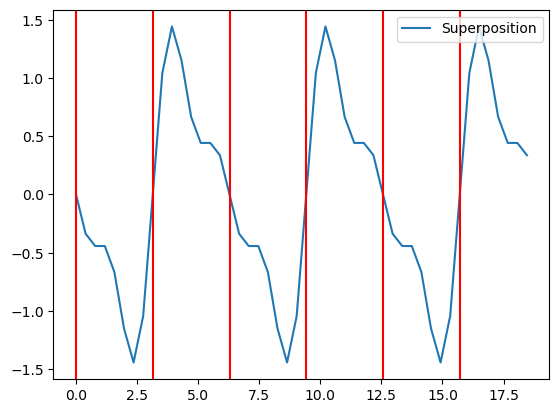

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

xs = np.arange(0, 3*(2*np.pi), np.pi/8)
ws = [1, 2, 3]

waves = [np.sin(w * xs) for w in ws]
super_pos = np.zeros_like(xs)
for i, wave in enumerate(waves):
    if i%2: super_pos += wave/(i+1)
    else: super_pos -= wave/(i+1)

# for i, wave in enumerate(waves):
    # plt.plot(xs, wave/(i+1), label=f'w={ws[i]}')
plt.plot(xs, super_pos, label='Superposition')
count = 1
for x in xs:
    if x % np.pi == 0:
        plt.axvline(x, color='r')
        count += 1

plt.legend()
plt.show()

In [29]:
# Testing my "max change in x-time or less" algorithm
import random
import pandas as pd
import numpy as np
nums = [random.randint(-5, 5) for _ in range(30)]

shifted = np.zeros((len(nums), 3))
shifted[:, 0] = nums
for i in range(1, 3):
    shifted[i:, i] = nums[:-i]
sums = np.zeros_like(shifted)
for i in range(3):
    sums[:, i] = np.sum(shifted[:, :i+1], axis=1)

maxs = np.max(sums, axis=1)
mins = np.min(sums, axis=1)
max_so_far = -np.inf
min_so_far = np.inf
ans = np.zeros_like(nums)
for i, (mini, maxi) in enumerate(zip(mins, maxs)):
    max_so_far = max(max_so_far, maxi)
    min_so_far = min(min_so_far, mini)
    if abs(min_so_far) > abs(max_so_far):
        ans[i] = min_so_far
    else:
        ans[i] = max_so_far


for num, a in zip(nums, ans):
    print(f'{num: >5}: {a}')

   -5: -5
    0: -5
    1: -5
    4: 5
    2: 7
    3: 9
   -5: 9
   -2: 9
    0: 9
   -2: 9
    1: 9
   -4: 9
    2: 9
    2: 9
    1: 9
    1: 9
    4: 9
    1: 9
   -3: 9
   -3: 9
   -3: 9
    4: 9
   -4: 9
    4: 9
    1: 9
    3: 9
   -2: 9
   -5: 9
   -3: -10
    4: -10


In [25]:
# Random walk statistics!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

nsims = 1e3
ndims = 1
nsteps = 1e5

nsims = int(nsims); nsteps = int(nsteps)
x = np.zeros((nsims, ndims, nsteps))

# Random walk
for t in tqdm(range(nsteps)):
    dx = np.random.choice([-1, 1], size=(nsims, ndims))
    x[:, :, t] = x[:, :, t-1] + dx

100%|██████████| 100000/100000 [00:02<00:00, 36294.44it/s]


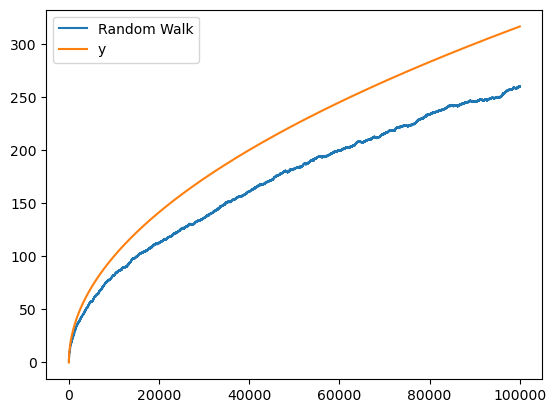

In [26]:
# Plot L2 norm
l2 = np.linalg.norm(x, axis=1)
l2 = np.mean(l2, axis=0)

xs = np.arange(nsteps)
y = xs ** 0.5

plt.plot(xs, l2, label='Random Walk')
plt.plot(xs, y, label='y')
plt.legend()

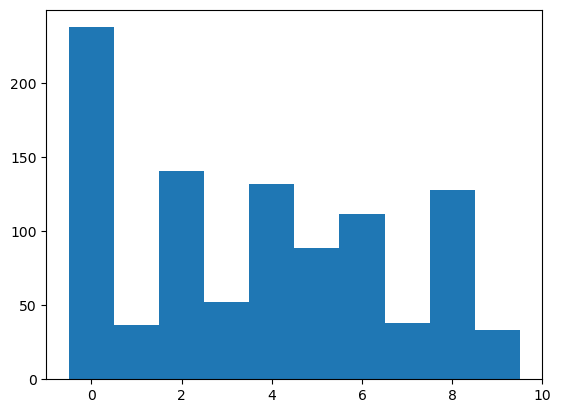

In [4]:
import numpy as np

set1 = np.arange(10)

choices1 = np.random.choice(set1, size=1000, replace=1)
choices2 = np.random.choice(set1, size=1000, replace=1)

x = choices1 * choices2

last_digit = x % 10

import matplotlib.pyplot as plt

plt.hist(last_digit, bins=np.arange(11)-0.5)
plt.show()

In [4]:
import os, copy
from pathlib import Path

path = Path('/Users/seanyamamoto/Downloads/Display Internal Academic Record.html')
print(path.parent, path.name)

/Users/seanyamamoto/Downloads Display Internal Academic Record.html


In [12]:
with open(path, 'r+') as f:
    raw_lines = f.readlines()

replacements = {
    '12/29/19': '12/29/21',
    '04/26/21': '04/26/23',
    'Fall 2022': 'Fall 2024',
    'Spring 2023': 'Spring 2025'
}
# years = np.arange(2018, 2023)
# sems = ['Fall', 'Spring']
# for year in years:
#     for sem in sems:
#         old_key = f'{sems} {year}'
#         new_key = f'{sems} {year+2}'
#         replacements[old_key] = new_key

lines = []
keys = list(replacements.keys())
for line in raw_lines:
    for key in keys:
        if key in line:
            line = line.replace(key, replacements[key])
            break
    
    lines.append(line)

new_fp = os.path.join(path.parent, 'edited_transcript.html')
with open(new_fp, 'w+') as f:
    for line in lines:
        f.write(f'{line}\n')

print(new_fp)

/Users/seanyamamoto/Downloads/edited_transcript.html


In [ ]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd

x = np.arange(0, 10, 0.1)
y = np.sin(x)

plt.plot(x, y)

In [6]:
import datetime
current_time = datetime.datetime.now().strftime('%A, %B %d at %-I:%M:%S %p')
# Get the time zone
current_time += ' ' + datetime.datetime.now().astimezone().tzname()
print(current_time)

Thursday, September 12 at 2:00:43 AM CDT


In [6]:
# ('+', '1.10101110101100100101001111000101', -5, 2) -> 0.05257526742207119

print(int('110101110101100100101001111000101', 2))
print(int('10101110101100100101001111000101', 2))
print(int('1', 2))

7225889733
2930922437
1


# Can we get more than 50% of the better?

In [31]:
import numpy as np

n = 10_000_000
x = np.random.rand(n, 2)
y = np.max(x, axis=1)
print(x.shape, y.shape)

(10000000, 2) (10000000,)


In [32]:
# Just choose first/second number
acc_1 = np.sum(x[:, 0] == y)/n 
acc_2 = np.sum(x[:, 1] == y)/n
print(acc_1, acc_2)

0.5001229 0.4998771


In [35]:
# Smart version, generate random number and re-pick if the first num is smaller
# than the random number
rand = np.random.rand(n)
choices = np.where(x[:, 0] < rand, x[:, 1], x[:, 0])
acc = np.sum(choices == y)/n
print(acc)

0.6666178


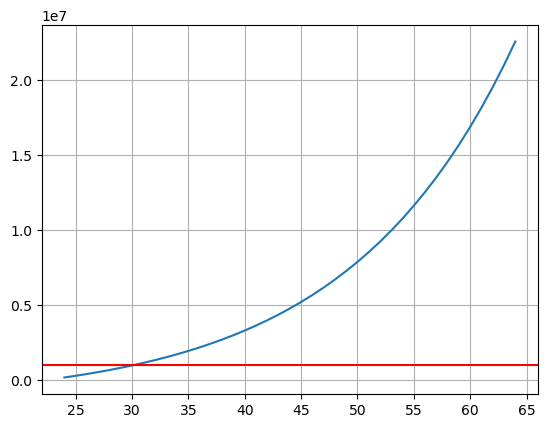

16000000.0


In [42]:
start = 70_000
return_rate = 0.07
years = 41

total = start
net = []
for i in range(years):
    total = total * (1 + return_rate)
    total += 100_000
    net.append(total)

import matplotlib.pyplot as plt
xs = np.arange(24, 24+years)
plt.plot(xs, net)
plt.grid()
# horizontal line at 1 million
plt.axhline(1_000_000, color='r')
plt.show()

print(1.6e7)


AttributeError: Module 'scipy' has no attribute 'linregress'